In [4]:
import pandas as pd
import numpy as np


In [5]:
s = pd.Series(np.random.randn(5))
print(s)

0    0.612970
1    0.226810
2    0.588815
3    0.477582
4   -1.537607
dtype: float64


In [6]:
df = pd.DataFrame(s, columns=['column 1'] ) 

df            

,column 1
0,0.612970
1,0.226810
2,0.588815
3,0.477582
4,-1.537607


In [ ]:
# can access colums by name
df['column 1']

In [7]:
# add columns
df['column 2'] = df['column 1'] * 4
df

,column 1,column 2
0,0.612970,2.451882
1,0.226810,0.907241
2,0.588815,2.355259
3,0.477582,1.910328
4,-1.537607,-6.150426


In [8]:
# manipulate, e.g. sorting
df.sort_values(by = 'column 2')

,column 1,column 2
4,-1.537607,-6.150426
1,0.226810,0.907241
3,0.477582,1.910328
2,0.588815,2.355259
0,0.612970,2.451882


In [9]:
# Boolean indexing
df[df['column 2'] <= 2] 

,column 1,column 2
1,0.226810,0.907241
3,0.477582,1.910328
4,-1.537607,-6.150426


In [10]:
df.apply(lambda x: min(x) + max(x))
# lambda takes min of each col + max of each

column 1   -0.924636
column 2   -3.698545
dtype: float64

In [16]:
df.describe()


,column 1,column 2
count,5.000000,5.000000
mean,0.073714,0.294857
std,0.913650,3.654602
min,-1.537607,-6.150426
25%,0.226810,0.907241
50%,0.477582,1.910328
75%,0.588815,2.355259
max,0.612970,2.451882


# exploring data, global temp

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [18]:
# read in data, csv from Kaggle
df = pd.read_csv('/Users/bobbybabra/Desktop/GlobalTemperatures.csv')

In [21]:
df.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [25]:
# renaming df with first two col
df = df.ix[:, :2]
df.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [26]:
df.describe()

,LandAverageTemperature
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


In [37]:
# cursory plot
plt.figure(figsize=(15,5))
plt.plot(df['LandAverageTemperature'])
#plt.scatter(x = df['LandAverageTemperature].index, y = df['LandAverageTemperature'])
plt.title('Average Land Temp 1750 - 2015')
plt.xlabel('Year')
plt.ylabel('Avg Land Temp')
plt.show()

SyntaxError: invalid syntax (<ipython-input-37-afcebbd765ae>, line 4)

In [38]:
# dates are a string
print(type(df['dt'][0]))

<class 'str'>


In [39]:
# convert to datetime obj
times = pd.DatetimeIndex(df['dt'])

# group by year
grouped = df.groupby([times.year]).mean()

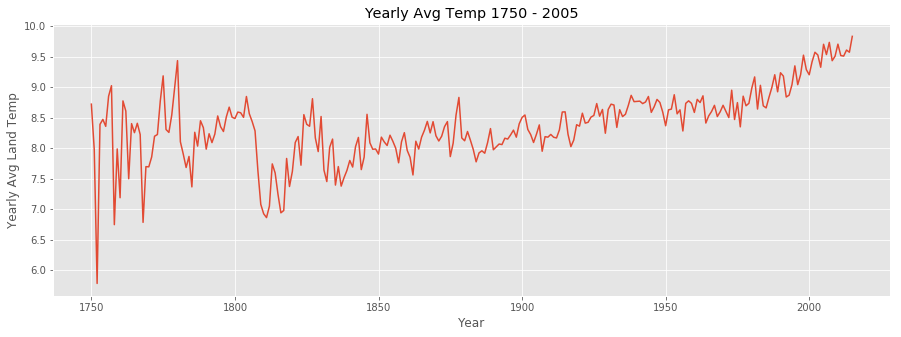

In [40]:
#plot
plt.figure(figsize=(15,5))
plt.plot(grouped['LandAverageTemperature'])

# change features of the graph
plt.title('Yearly Avg Temp 1750 - 2005')
plt.xlabel('Year')
plt.ylabel('Yearly Avg Land Temp')
plt.show()

In [41]:
# how many cells are NaN values?
df[np.isnan(df['LandAverageTemperature'])]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


In [42]:
## summer of '52 values are NaN and accounts for low mean of that year

In [43]:
## fill in previous values for NaN gaps with df.fillna method
df['LandAverageTemperature'] = df['LandAverageTemperature'].fillna(method='ffill')

In [44]:
# Model a Dataset

In [45]:
 from sklearn.linear_model import LinearRegression as LinReg

In [46]:
x = grouped.index.values.reshape(-1, 1)
y = grouped['LandAverageTemperature'].values

In [49]:
reg = LinReg()
reg.fit(x, y)
y_preds = reg.predict(x)
print("Accuracy: " + str(reg.score(x, y)))

Accuracy: 0.387302697296


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


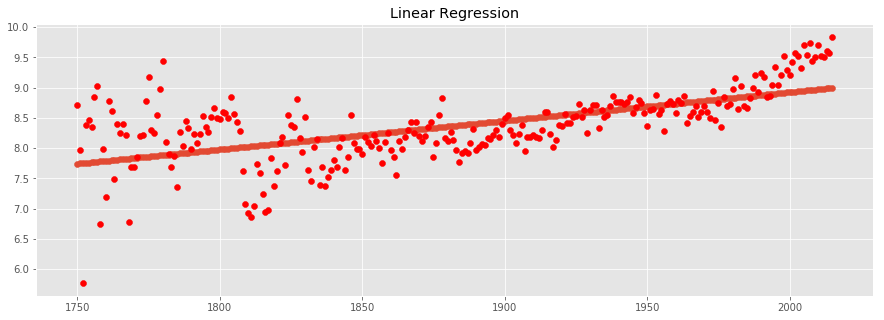

In [50]:
plt.figure(figsize=(15,5))
plt.title('Linear Regression')
plt.scatter(x=x,y = y_preds)
plt.scatter(x=x,y=y, c='r')

In [51]:
reg.predict(2050)

array([ 9.16189553])